In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score
import sklearn.linear_model as linear_model
import sklearn.model_selection as model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error

### Read the data first
Note that there are some missing values in the data!

In [3]:
file = "2023.csv"
data = pd.read_csv(file)
data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


### Overview of the Ladder score over years
The file do not have data from every country. Thus, those would be in white/gray color.

In [183]:
fig = px.choropleth(data.sort_values("year"), 
                    locations = "Country name", 
                    color = "Life Ladder",
                    locationmode = "country names",
                   animation_frame = "year")
fig.update_layout(title = "Ladder Score Comparison by Countries")
fig.show()

### Data cleaning
Start to deal with missing data, and make some necessary adjustments for future models.

In [6]:
data[data.isna().any(axis=1)].count()

Country name                        241
year                                241
Life Ladder                         241
Log GDP per capita                  221
Social support                      228
Healthy life expectancy at birth    187
Freedom to make life choices        208
Generosity                          168
Perceptions of corruption           125
Positive affect                     217
Negative affect                     225
dtype: int64

In [7]:
total_labels = list(data.columns)[2:]
features_labels = total_labels[1:]
print(total_labels)
print(features_labels)

['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']


In [8]:
data_copy = data.copy()
data_copy.dropna(axis=0,inplace=True)
data_copy[data_copy.isna().any(axis=1)].count()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

### Correlation between columns
Trying to find the relationship between them.

<Axes: >

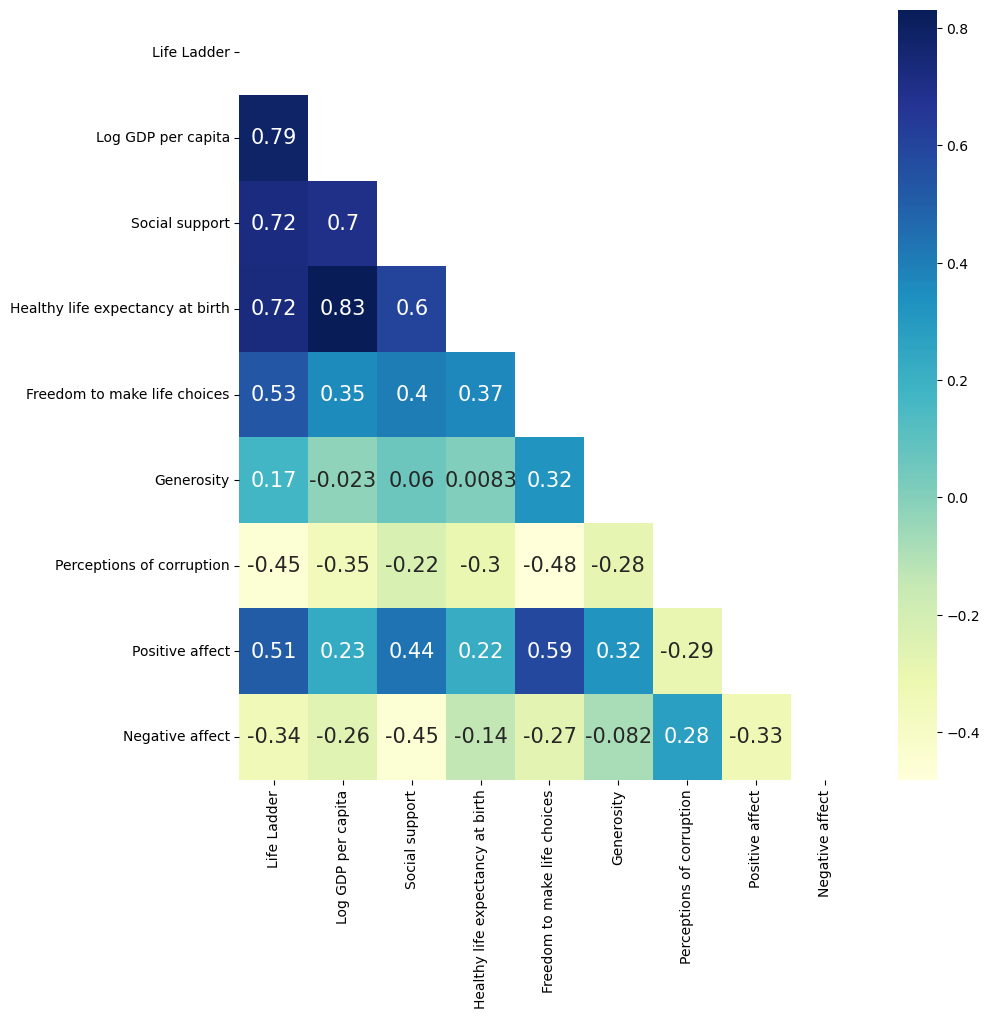

In [9]:
correlation_between_column = data_copy[total_labels].corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_between_column, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)

In [45]:
features = data_copy[features_labels].to_numpy()
ladder = data_copy['Life Ladder'].to_numpy()

### Linear regression model
This model takes all the columns as features (except the life ladder), and them make the regression. It has a 76% accuracy based on the R-square.

In [46]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features,
    ladder,
    train_size=0.80,
    random_state=0
    )

In [47]:
lm = linear_model.LinearRegression()

In [48]:
lm.fit(X_train, y_train)

LinearRegression()

In [49]:
coef = zip(features_labels, lm.coef_)
coef_df = pd.DataFrame(list(zip(features_labels, lm.coef_)), columns=['features', 'coefficients'])
coef_df

,features,coefficients
0,Log GDP per capita,0.408775
1,Social support,1.763354
2,Healthy life expectancy at birth,0.025885
3,Freedom to make life choices,0.412269
4,Generosity,0.389973
5,Perceptions of corruption,-0.618158
6,Positive affect,2.364259
7,Negative affect,-0.082457


In [50]:
print('Intercept:',lm.intercept_)

Intercept: -2.784686097710794


In [65]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

(1566, 8)


In [52]:
print('Difference:')
print(y_test[:10]-y_test_pred[:10])

Difference:
[-0.80146441 -0.53704262 -0.07565085  0.65050685  0.3851     -1.64121439
  0.07184321 -0.46893899 -0.20635549 -0.18349027]


In [53]:
score = r2_score(y_test, y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 76.0%


### Trying out different ways
Try to learn more into the data. Looked into for each year and try to find and relationship that could help predict the life ladder score for the following year. Also, looked into data grouped by different countries, and it turns out that every country has a different kind of year-by-year relaionship.

In [19]:
data_2022 = data[data['year']==2022]
data_2022

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
13,Afghanistan,2022,1.281,NaN,0.228,54.875,0.368,NaN,0.733,0.206,0.576
28,Albania,2022,5.212,9.626,0.724,69.175,0.802,-0.066,0.846,0.547,0.255
59,Argentina,2022,6.261,10.011,0.893,67.250,0.825,-0.128,0.810,0.724,0.284
75,Armenia,2022,5.382,9.668,0.811,67.925,0.790,-0.154,0.705,0.531,0.549
91,Australia,2022,7.035,10.854,0.942,71.125,0.854,0.153,0.545,0.711,0.244
...,...,...,...,...,...,...,...,...,...,...,...
2104,Uruguay,2022,6.671,10.084,0.905,67.500,0.878,-0.052,0.631,0.775,0.267
2120,Uzbekistan,2022,6.016,8.990,0.879,65.600,0.959,0.309,0.616,0.741,0.225
2137,Venezuela,2022,5.949,NaN,0.899,63.875,0.770,NaN,0.798,0.754,0.292
2154,Vietnam,2022,6.267,9.333,0.879,65.600,0.975,-0.179,0.703,0.774,0.108


Year: 2006 Ladder: 5.196898876404495
Year: 2007 Ladder: 5.418274509803921
Year: 2008 Ladder: 5.418509090909092
Year: 2009 Ladder: 5.457666666666667
Year: 2010 Ladder: 5.496806451612904
Year: 2011 Ladder: 5.424082191780822
Year: 2012 Ladder: 5.443617021276595
Year: 2013 Ladder: 5.393294117647058
Year: 2014 Ladder: 5.386263888888888
Year: 2015 Ladder: 5.400943661971831
Year: 2016 Ladder: 5.396446808510639
Year: 2017 Ladder: 5.460408163265306
Year: 2018 Ladder: 5.498673758865248
Year: 2019 Ladder: 5.5709650349650355
Year: 2020 Ladder: 5.727517241379309
Year: 2021 Ladder: 5.636245901639344
Year: 2022 Ladder: 5.585140350877194


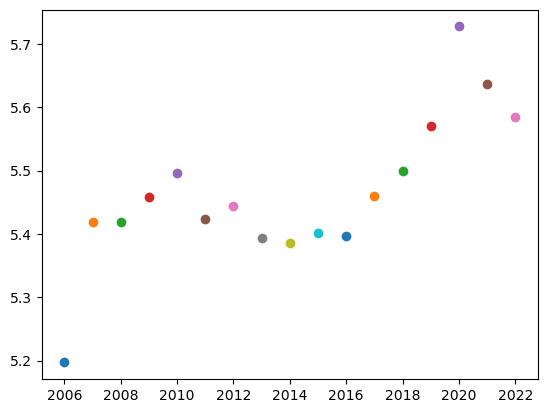

In [20]:
for i in range(2006, 2023):
    print('Year:',i, 'Ladder:', np.mean(data[data['year']==i]['Life Ladder']))    
    plt.scatter(i, np.mean(data[data['year']==i]['Life Ladder']))

plt.show()

In [21]:
data_canada = data[data['Country name']=='Canada']
data_canada

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
327,Canada,2005,7.418,10.707,0.962,70.50,0.957,0.248,0.503,0.783,0.233
328,Canada,2007,7.482,10.734,NaN,70.62,0.930,0.246,0.406,0.812,0.257
329,Canada,2008,7.486,10.733,0.939,70.68,0.926,0.258,0.370,0.802,0.202
330,Canada,2009,7.488,10.692,0.943,70.74,0.915,0.242,0.413,0.793,0.248
331,Canada,2010,7.650,10.711,0.954,70.80,0.934,0.227,0.413,0.791,0.233
332,Canada,2011,7.426,10.733,0.922,70.86,0.951,0.249,0.433,0.803,0.248
333,Canada,2012,7.415,10.739,0.948,70.92,0.918,0.286,0.466,0.776,0.229
334,Canada,2013,7.594,10.752,0.936,70.98,0.916,0.312,0.406,0.801,0.263
335,Canada,2014,7.304,10.770,0.918,71.04,0.939,0.266,0.442,0.791,0.259
336,Canada,2015,7.413,10.769,0.939,71.10,0.931,0.249,0.427,0.792,0.286


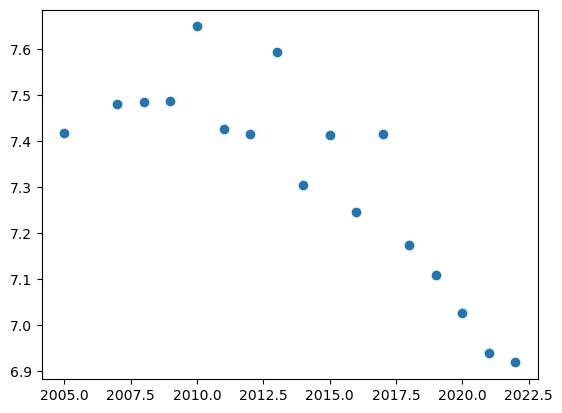

In [22]:
plt.scatter(data_canada['year'], data_canada['Life Ladder'])

In [120]:
data_2022_ladder = data_2022["Life Ladder"]
data_2022_ladder

28      5.212
59      6.261
75      5.382
91      7.035
106     6.999
        ...  
2087    6.693
2104    6.671
2120    6.016
2154    6.267
2198    3.296
Name: Life Ladder, Length: 104, dtype: float64

### Predicting ladder score
In order to predict the score for the following year, I tried to use the data year before to predict the year followed. Therefore, I took the features from 2020 and predicted the score in 2021. However, it turns out only having about 53% accuracy.

In [154]:
data_2021 = data[data['year']==2021]
data_2021.dropna(axis=0,inplace=True)
data_2022.dropna(axis=0,inplace=True)
data_2021_common = data_2021[data_2021['Country name'].isin(data_2022['Country name'])]
data_2021_common

/var/folders/k4/818s6pw91s11_s19pmndzl4h0000gn/T/ipykernel_46358/3930459786.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/k4/818s6pw91s11_s19pmndzl4h0000gn/T/ipykernel_46358/3930459786.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
27,Albania,2021,5.255,9.583,0.702,69.15,0.827,0.041,0.896,0.554,0.254
58,Argentina,2021,5.908,9.977,0.882,67.20,0.819,-0.012,0.816,0.685,0.345
74,Armenia,2021,5.301,9.561,0.762,67.65,0.795,-0.156,0.705,0.566,0.478
90,Australia,2021,7.112,10.815,0.920,71.05,0.912,0.236,0.454,0.740,0.235
105,Austria,2021,7.080,10.899,0.863,71.15,0.795,0.159,0.501,0.722,0.259
...,...,...,...,...,...,...,...,...,...,...,...
2086,United States,2021,6.959,11.061,0.920,65.85,0.816,0.190,0.687,0.740,0.277
2103,Uruguay,2021,6.502,10.035,0.914,67.50,0.899,-0.051,0.606,0.746,0.263
2119,Uzbekistan,2021,6.185,8.953,0.896,65.30,0.927,0.186,0.662,0.698,0.233
2153,Vietnam,2021,5.540,9.271,0.799,65.50,0.897,0.107,0.798,0.651,0.280


In [155]:
data_2022_common = data_2022[data_2022['Country name'].isin(data_2021['Country name'])]
data_2022_common

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
28,Albania,2022,5.212,9.626,0.724,69.175,0.802,-0.066,0.846,0.547,0.255
59,Argentina,2022,6.261,10.011,0.893,67.250,0.825,-0.128,0.810,0.724,0.284
75,Armenia,2022,5.382,9.668,0.811,67.925,0.790,-0.154,0.705,0.531,0.549
91,Australia,2022,7.035,10.854,0.942,71.125,0.854,0.153,0.545,0.711,0.244
106,Austria,2022,6.999,10.939,0.876,71.275,0.856,0.139,0.524,0.718,0.226
...,...,...,...,...,...,...,...,...,...,...,...
2087,United States,2022,6.693,11.079,0.900,65.725,0.736,0.191,0.701,0.712,0.267
2104,Uruguay,2022,6.671,10.084,0.905,67.500,0.878,-0.052,0.631,0.775,0.267
2120,Uzbekistan,2022,6.016,8.990,0.879,65.600,0.959,0.309,0.616,0.741,0.225
2154,Vietnam,2022,6.267,9.333,0.879,65.600,0.975,-0.179,0.703,0.774,0.108


In [147]:
new_features_labels = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data_2021_common[features_labels].to_numpy(),
    data_2022_common['Life Ladder'],
    train_size=0.80,
    random_state=0
    )

In [148]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [149]:
coef = zip(features_labels, lm.coef_)
coef_df = pd.DataFrame(list(zip(features_labels, lm.coef_)), columns=['features', 'coefficients'])
coef_df

,features,coefficients
0,Log GDP per capita,0.253945
1,Social support,4.143868
2,Healthy life expectancy at birth,0.023053
3,Freedom to make life choices,1.252470
4,Generosity,-0.090293
5,Perceptions of corruption,-1.154053
6,Positive affect,2.183924
7,Negative affect,0.903824


In [150]:
print('Intercept:',lm.intercept_)

Intercept: -3.4555574702117617


In [151]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [152]:
score = r2_score(y_test, y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)

The accuracy of our model is 53.0%
Mean Squared Error: 0.3972692058180728


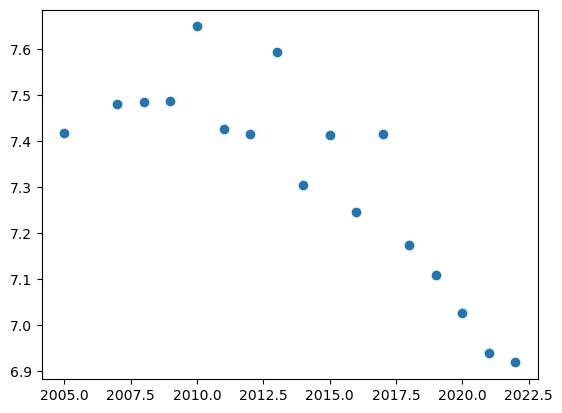

In [37]:
data_canada = data[data['Country name']=='Canada']
plt.scatter(data_canada.year, data_canada['Life Ladder'])

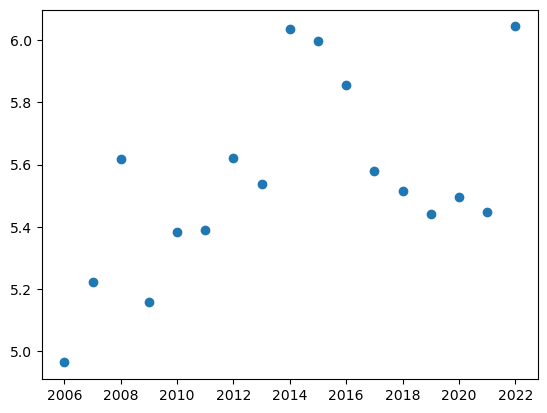

In [38]:
data_russia = data[data['Country name']=='Russia']
plt.scatter(data_russia.year, data_russia['Life Ladder'])

In [71]:
russia_test = data_russia[-6:-1][features_labels].mean().to_numpy()
russia_test = np.reshape(russia_test, (1, 8))

In [82]:
russia_pred = lm.predict(russia_test)
print('Predicted:', russia_pred)
print('Actual:', data_russia[-1:]['Life Ladder'])

Predicted: [5.73336527]
Actual: 1635    6.044
Name: Life Ladder, dtype: float64


In [83]:
canada_test = data_canada[-6:-1][features_labels].mean().to_numpy()
canada_test = np.reshape(canada_test, (1, 8))
canada_pred = lm.predict(canada_test)
print('Predicted:', canada_pred)
print('Actual:', data_canada[-1:]['Life Ladder'])

Predicted: [7.08363939]
Actual: 343    6.918
Name: Life Ladder, dtype: float64


In [86]:
data_ukraine = data[data['Country name']=='Ukraine']
ukraine_test = data_ukraine[-6:-1][features_labels].mean().to_numpy()
ukraine_test = np.reshape(ukraine_test, (1, 8))
ukraine_pred = lm.predict(ukraine_test)
print('Predicted:', ukraine_pred)
print('Actual:', data_ukraine[-1:]['Life Ladder'])

Predicted: [5.33568348]
Actual: 2038    4.637
Name: Life Ladder, dtype: float64


In [87]:
data_chile = data[data['Country name']=='Chile']
chile_test = data_chile[-6:-1][features_labels].mean().to_numpy()
chile_test = np.reshape(chile_test, (1, 8))
chile_pred = lm.predict(chile_test)
print('Predicted:', chile_pred)
print('Actual:', data_chile[-1:]['Life Ladder'])

Predicted: [6.24699767]
Actual: 380    6.415
Name: Life Ladder, dtype: float64


In [129]:
data_2020 = data[data['year']==2020]
data_2020.dropna(axis=0,inplace=True)
data_2021.dropna(axis=0,inplace=True)
data_2020_common = data_2020[data_2020['Country name'].isin(data_2021['Country name'])]
data_2020_common

/var/folders/k4/818s6pw91s11_s19pmndzl4h0000gn/T/ipykernel_46358/731927130.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/k4/818s6pw91s11_s19pmndzl4h0000gn/T/ipykernel_46358/731927130.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
26,Albania,2020,5.365,9.492,0.710,69.125,0.754,0.004,0.891,0.563,0.265
37,Algeria,2020,5.438,9.291,0.868,66.500,0.574,-0.121,0.724,0.524,0.311
57,Argentina,2020,5.901,9.888,0.897,67.150,0.823,-0.129,0.816,0.679,0.342
89,Australia,2020,7.137,10.794,0.937,70.975,0.905,0.203,0.491,0.726,0.205
104,Austria,2020,7.213,10.859,0.925,71.025,0.912,0.006,0.464,0.716,0.206
...,...,...,...,...,...,...,...,...,...,...,...
2102,Uruguay,2020,6.310,9.991,0.921,67.500,0.908,-0.091,0.491,0.721,0.265
2118,Uzbekistan,2020,5.842,8.902,0.850,65.000,0.928,0.193,0.642,0.678,0.279
2152,Vietnam,2020,5.462,9.254,0.765,65.400,0.945,0.066,0.791,0.699,0.286
2180,Zambia,2020,4.838,8.066,0.767,54.825,0.750,0.058,0.810,0.679,0.345


In [187]:
data_2021_common = data_2021[data_2021['Country name'].isin(data_2020['Country name'])]
data_2021_common

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
27,Albania,2021,5.255,9.583,0.702,69.15,0.827,0.041,0.896,0.554,0.254
38,Algeria,2021,5.217,9.309,0.841,66.60,0.558,-0.113,0.712,0.498,0.258
58,Argentina,2021,5.908,9.977,0.882,67.20,0.819,-0.012,0.816,0.685,0.345
90,Australia,2021,7.112,10.815,0.920,71.05,0.912,0.236,0.454,0.740,0.235
105,Austria,2021,7.080,10.899,0.863,71.15,0.795,0.159,0.501,0.722,0.259
...,...,...,...,...,...,...,...,...,...,...,...
2103,Uruguay,2021,6.502,10.035,0.914,67.50,0.899,-0.051,0.606,0.746,0.263
2119,Uzbekistan,2021,6.185,8.953,0.896,65.30,0.927,0.186,0.662,0.698,0.233
2153,Vietnam,2021,5.540,9.271,0.799,65.50,0.897,0.107,0.798,0.651,0.280
2181,Zambia,2021,3.082,8.082,0.619,55.25,0.833,0.141,0.824,0.656,0.349


### Still predicting
Here, I used not only the features from the previous year, but also the score from the previous year as one variable. And it turns out having a much more accurate prediction, which is about 90%.

In [188]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data_2020_common[new_features_labels].to_numpy(),
    data_2021_common['Life Ladder'],
    train_size=0.80,
    random_state=0
    )

In [132]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [133]:
coef = zip(features_labels, lm.coef_)
coef_df = pd.DataFrame(list(zip(features_labels, lm.coef_)), columns=['features', 'coefficients'])
coef_df

,features,coefficients
0,Log GDP per capita,0.783124
1,Social support,0.275425
2,Healthy life expectancy at birth,-0.277507
3,Freedom to make life choices,0.003005
4,Generosity,0.817947
5,Perceptions of corruption,-0.115704
6,Positive affect,0.216423
7,Negative affect,1.312530


In [134]:
print('Intercept:',lm.intercept_)

Intercept: -3.326346418695943


In [137]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [138]:
score = r2_score(y_train, y_train_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 90.0%


In [136]:
score = r2_score(y_test, y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 86.0%


In [158]:
new_features_labels = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data_2021_common[new_features_labels].to_numpy(),
    data_2022_common['Life Ladder'],
    train_size=0.80,
    random_state=0
    )

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

temp_pred = lm.predict(data_2021_common[new_features_labels].to_numpy())
temp_act = data_2022_common['Life Ladder']
score = r2_score(temp_act, temp_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

mse = mean_squared_error(temp_act, temp_pred)
print("Mean Squared Error:", mse)

The accuracy of our model is 90.0%
Mean Squared Error: 0.1302147490365241


### Predict for the score for 2023
Use the current model to predict for the 2023 score!

In [161]:
pred_2023 = lm.predict(data_2022[new_features_labels].to_numpy())
pred_2023

array([5.08184955, 6.25064831, 5.56009584, 7.06868428, 6.96425422,
       3.29893361, 6.9048694 , 3.95435089, 5.98189577, 3.49206341,
       6.24122708, 5.33157626, 4.55884937, 4.51728494, 7.05440802,
       4.47345425, 6.4698665 , 6.01185628, 3.5153871 , 5.55506486,
       3.39636723, 7.03948381, 5.59913031, 6.6893368 , 7.65022331,
       5.59106299, 6.02425525, 6.43396507, 6.52498747, 3.87202639,
       7.73063209, 6.63523704, 5.13498359, 4.39058652, 5.07165003,
       6.64739386, 4.0884901 , 5.78896464, 6.0741906 , 5.17078066,
       5.83822924, 5.88051129, 7.41561826, 4.01317116, 5.72125605,
       5.1912042 , 6.95661312, 7.4109775 , 6.26847868, 4.61476231,
       5.85472915, 6.20097956, 4.58183497, 5.90691346, 4.49173445,
       5.7110586 , 5.93480486, 2.47279842, 4.08189448, 6.62500208,
       7.17193706, 4.13828533, 3.27700999, 4.22070021, 4.73443199,
       5.6928705 , 6.83533149, 5.50949084, 5.66288623, 4.46529084,
       4.60391369, 4.87166384, 5.27947968, 7.34590589, 7.07766

In [167]:
country_pred_2023 = zip(data_2022['Country name'], pred_2023)
pred_2023_df = pd.DataFrame(list(zip(data_2022['Country name'], pred_2023)), columns=['Country', 'Life Ladder'])
pred_2023_df

,Country,Life Ladder
0,Albania,5.081850
1,Argentina,6.250648
2,Armenia,5.560096
3,Australia,7.068684
4,Austria,6.964254
...,...,...
99,United States,6.643990
100,Uruguay,6.687525
101,Uzbekistan,6.092860
102,Vietnam,6.110874


In [171]:
fig = px.choropleth(pred_2023_df, 
                    locations = "Country", 
                    color = "Life Ladder",
                    locationmode = "country names")
fig.update_layout(title = "Predicted 2023 Ladder Score Comparison by Countries")
fig.show()